№1

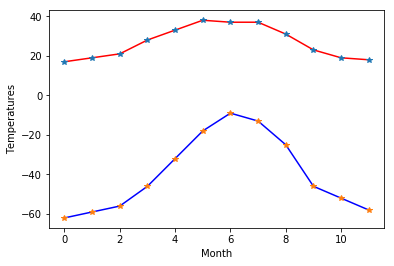

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def f(a, b, c, d):
    return (b + c * np.cos((a + d) * 2 * 3.1415 / a.max()))

max_ = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_ = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

plt.xlabel('Month')
plt.ylabel('Temperatures')
plt.plot(months, max_, 'red')
plt.plot(months, min_, 'blue')

plt.plot(months, max_, '*')
plt.plot(months, min_, '*')
plt.show()



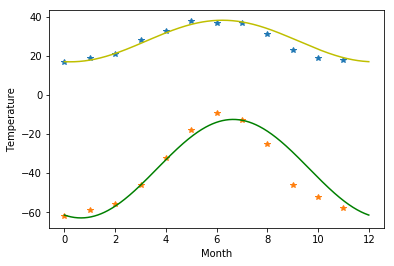

In [4]:
r1, c1 = optimize.curve_fit(f, months, max_, [20, 10, 0])
r2, c2 = optimize.curve_fit(f, months, min_, [-40, 20, 0])

days = np.linspace(0, 12, num = 365)
#print (days)
plt.plot(months, max_, '*')
plt.plot(days, f(days, *r1), 'y')
plt.plot(months, min_, '*')
plt.plot(days, f(days, *r2), 'g')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

№2

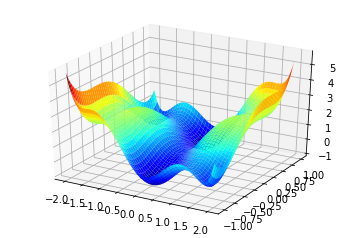

array([-0.08984141,  0.71265608, -1.        ,  1.        ])

In [44]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

def func(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + \
        4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xgr, ygr = np.meshgrid(x, y)

fig = plt.figure()
cr = fig.add_subplot(111, projection='3d')
surf = cr.plot_surface(xgr, ygr, func([xgr, ygr]), cmap=plt.cm.jet)

plt.show()

res = optimize.minimize(func,[(-2,2),(-1,1)])
res.x

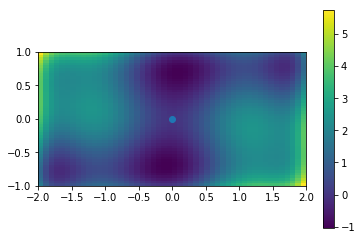

In [6]:
plt.imshow(dz_func([set_x, set_y]), extent=[-2, 2, -1, 1])
plt.colorbar()
plt.scatter(x_min[0], x_min[1])

plt.show()

#3

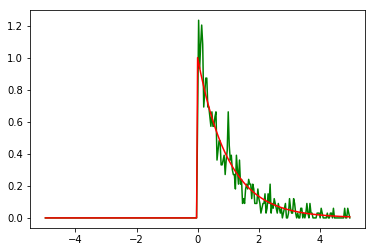

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
a = np.random.gamma (1, size = 1000)
aa = np.linspace (-5, 5, 300)
bb = np.histogram (a, bins = aa, density = True)[0]
aa = 1 / (2.0) * (aa[1:] + aa[:-1])
b = stats.gamma.pdf (aa,1)
plt.plot (aa, bb, "green")
plt.plot (aa, b, "red")
plt.show ()

#4

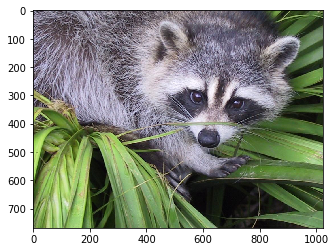

In [14]:
from scipy import misc
from scipy import ndimage
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
face = misc.face()
plt.imshow(face)
plt.show()


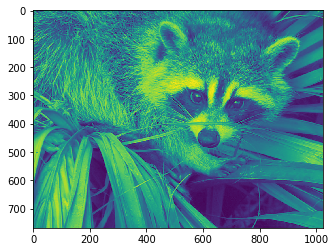

In [15]:
face = misc.face(gray=True)
plt.imshow(face)
plt.show()

In [23]:

noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std()*0.5*np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(blurred_face, size=5)
wiener_face = signal.wiener(blurred_face, (5,5))



/home/ksenia/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/home/ksenia/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


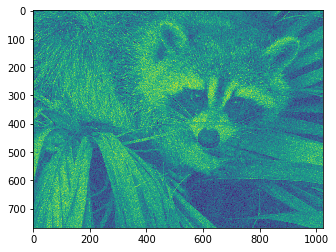

In [24]:
plt.imshow(noisy_face)
plt.show()

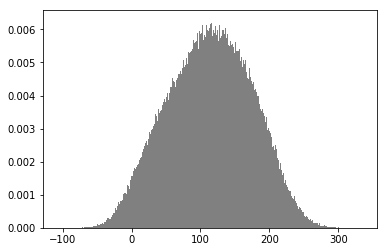

In [17]:

plt.hist(noisy_face.reshape((-1)), density=1, bins=1000, color = 'gray')
plt.show()

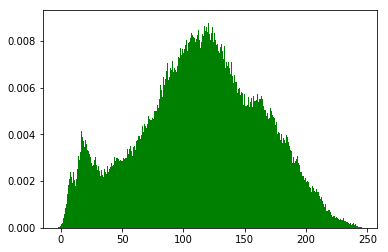

In [18]:

plt.hist(blurred_face.reshape((-1)), density=1, bins=1000, color = 'green')
plt.show()

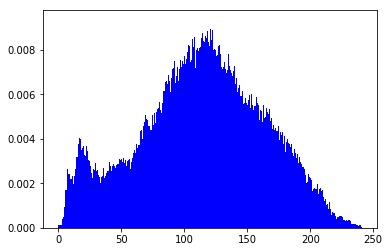

In [15]:

plt.hist(median_face.reshape((-1)), density=1, bins=1000, color = 'blue')
plt.show()

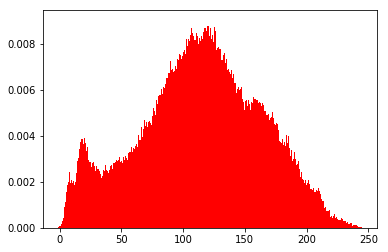

In [19]:

plt.hist(wiener_face.reshape((-1)), density=1, bins=1000, color = 'red')
plt.show()

#5

In [14]:
a = np.zeros((7, 7), dtype=np.int)
a[1:6, 2:5] = 1
b = ndimage.binary_erosion(a).astype(a.dtype)
c = ndimage.binary_dilation(b).astype(a.dtype)
d = ndimage.binary_opening(a).astype(np.int)
print(b)
print()
print(c)
print()
print(d)



[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]

[[0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 1 1 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]]


#6

In [11]:
a = np.zeros ((50, 50))
a[10:-10, 10:-10] = 1
a += 0.25*np.random.standard_normal (a.shape)
m = a >= 0.5
o_m = ndimage.binary_opening (m)
c_m = ndimage.binary_closing (o_m)
k = 30 * 30
print (k - np.sum (c_m) < 30 * 30)

True


#7

/home/ksenia/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


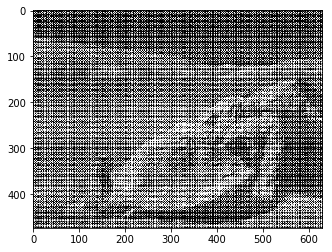

In [9]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm    

image = plt.imread ('http://members.cbio.mines-paristech.fr/~nvaroquaux/formations/scipy-lecture-notes/_images/moonlanding.png').astype (float)

plt.figure()
plt.imshow(image, plt.cm.gray)
fft = fftpack.fft2(image)



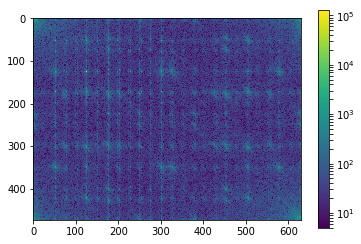

In [41]:
plt.figure()
plt.imshow (np.abs (fft), norm = LogNorm (vmin = 5))
plt.colorbar ()
keep_fraction = 0.1
fft2 = fft.copy()
r, c = fft2.shape
fft2[int (r * keep_fraction) : int (r * (1 - keep_fraction))] = 0
fft2[:, int (c * keep_fraction) : int (c * (1 - keep_fraction))] = 0

plt.imshow (np.abs (fft2), norm = LogNorm (vmin = 5))
#plt.colorbar ()

In [29]:

new = fftpack.ifft2(fft2).real


/home/ksenia/anaconda3/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


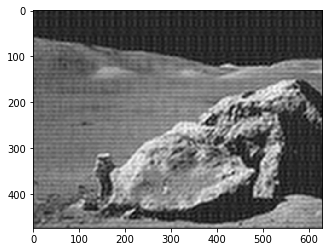

In [30]:
plt.imshow(new, plt.cm.gray)
blur = ndimage.gaussian_filter(image, 4)


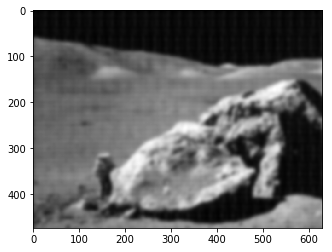

In [21]:
plt.figure()
plt.imshow(blur, plt.cm.gray)
plt.show()